# Predicting the burned area of forest fires

In [25]:
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
%matplotlib inline

### Reading the dataset

In [3]:
# Downloaded from: https://archive.ics.uci.edu/ml/datasets/forest+fires
forest_df = pd.read_csv('./data/forestfires.csv', sep = ',')

In [4]:
forest_df.shape

(517, 13)

In [5]:
forest_df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [6]:
forest_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Analyzing the target attribute

In [7]:
forest_df['area'].describe(percentiles = [.25, .5, .75, .95, .99])

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
95%        48.714000
99%       194.764800
max      1090.840000
Name: area, dtype: float64

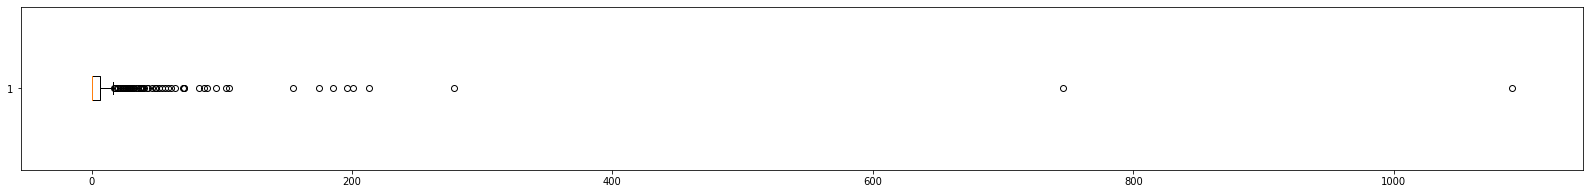

In [8]:
plt.figure(figsize = (28, 3))
plt.boxplot(forest_df['area'], vert = False)
plt.show()

In [9]:
forest_no_outliers_df = forest_df.loc[forest_df['area'] <= forest_df['area'].quantile(.99)]

In [10]:
forest_no_outliers_df.shape

(511, 13)

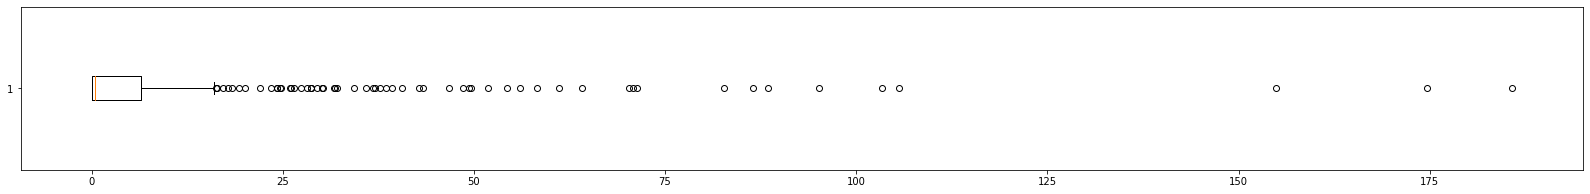

In [11]:
plt.figure(figsize = (28, 3))
plt.boxplot(forest_no_outliers_df['area'], vert = False)
plt.show()

### Splitting train and test datasets

In [12]:
X = forest_no_outliers_df[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]

In [13]:
Y = forest_no_outliers_df['area']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [15]:
X_train.shape

(357, 10)

In [16]:
X_test.shape

(154, 10)

### Training the model

In [17]:
regr = linear_model.LinearRegression()

In [18]:
regr.fit(X_train, Y_train)

LinearRegression()

### Evaluating the model

In [19]:
predictions = regr.predict(X_test)

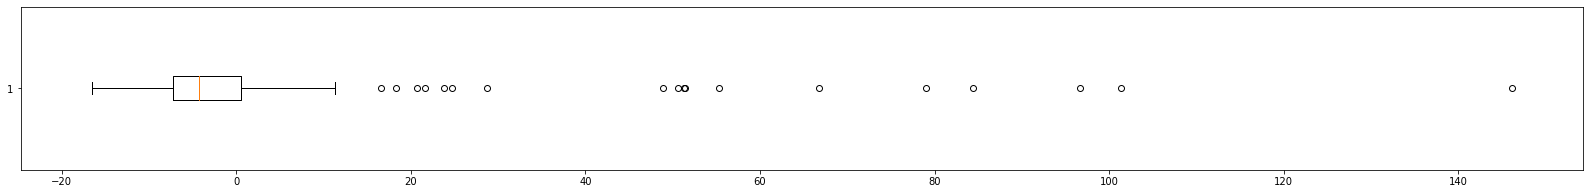

In [20]:
plt.figure(figsize = (28, 3))
plt.boxplot((Y_test - predictions), vert = False)
plt.show()

In [21]:
# MAE: Mean Absolute Error
mean_absolute_error(Y_test, predictions)

11.655072514845937

In [22]:
# (R)MSE: (Root) Mean Squared Error
np.sqrt(mean_squared_error(Y_test, predictions))

23.091452644310955

In [23]:
# R2: Coefficient of determination
r2_score(Y_test, predictions)

-0.037422386890950676